This is a simple example of using MLNN.py. The main purpose of creating MLNN.py was to play around with the mechanics, or computation, involved in creating a multilayer neural network. I have not given much time or thought into actual analyzing the titanic data, again, this only serves as a simple example to show MLNN.py works.

In [52]:
import MLNN
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('data/titanic_data.csv')

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df[df.columns[~df.isnull().any()]]

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000


I am going to attempt to predict if a passenger survived based off the passengers Sex and Pclass

In [5]:
gender = {
    'male': 0,
    'female': 1
}

df['numGender'] = df['Sex'].apply(lambda x : gender[x])

Splitting the data into a testing/train set could definitily be done better, but doing this for now for something quick.

In [6]:
train = df.head(int(len(df)*(.8)))
test = df.iloc[max(train.index):]

In [7]:
X = np.array(train[['Pclass', 'numGender']])
Y = np.array(train['Survived'])
Xt = np.array(test[['Pclass', 'numGender']])
Yt = np.array(test['Survived'])

In [73]:
num_epochs = 100
learn_rate = .01
network = MLNN.three_layer_NN(X,Y,4,2,1)
p, c = network.train(num_epochs,learn_rate, hidden_activation='relu', output_activation='sigmoid', verbose=False)

Acc [84.49838097] | Error [15.50161903]


Text(0.5, 0, 'Epoch')

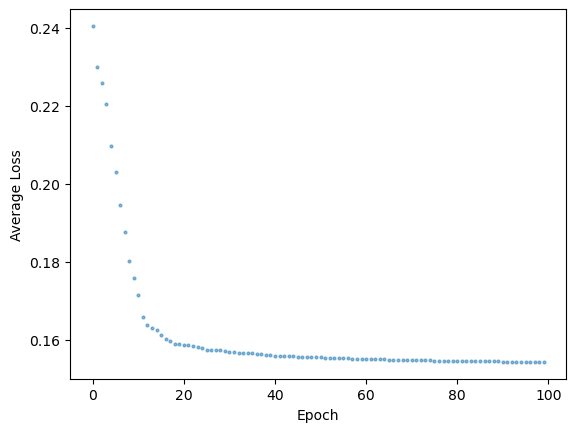

In [74]:
avg_epoch_loss = []
for i in range(num_epochs):
    avg = 0
    for j in range(X.shape[0]):
        avg += c[i*num_epochs+j]/X.shape[0]
    avg_epoch_loss.append(avg)
    
plt.scatter(np.arange(0, num_epochs), avg_epoch_loss, alpha=0.5, s=4)
plt.ylabel("Average Loss")
plt.xlabel("Epoch")


In [75]:
predictions = network.predict(Xt)

In [76]:
cost = np.square(predictions - Yt)
print(f'Acc {(1 - (np.sum(cost) / cost.size)) * 100} | Error {(np.sum(cost) / cost.size)*100}')

Acc 68.23300578636002 | Error 31.766994213639972


[Text(0.25, 0, 'Deceased'), Text(0.75, 0, 'Survived')]

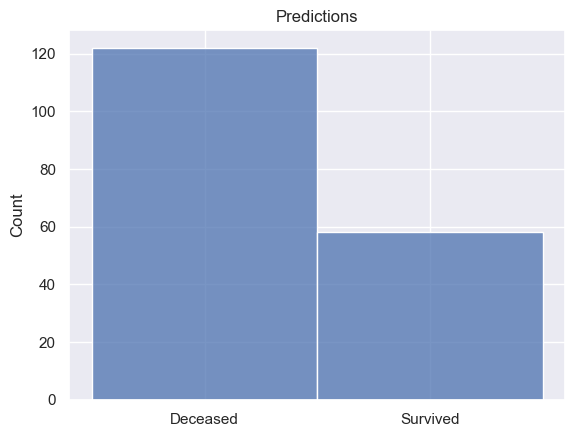

In [99]:
predictions = [1 if  p > 0.5 else 0 for p in predictions]


sns.set()
h = sns.histplot(predictions, bins=[0,1], binwidth=.5)
plt.title('Predictions')
plt.ylabel('Count')

h.set_xticks([0.25, .75])
h.set_xticklabels(["Deceased", "Survived"])

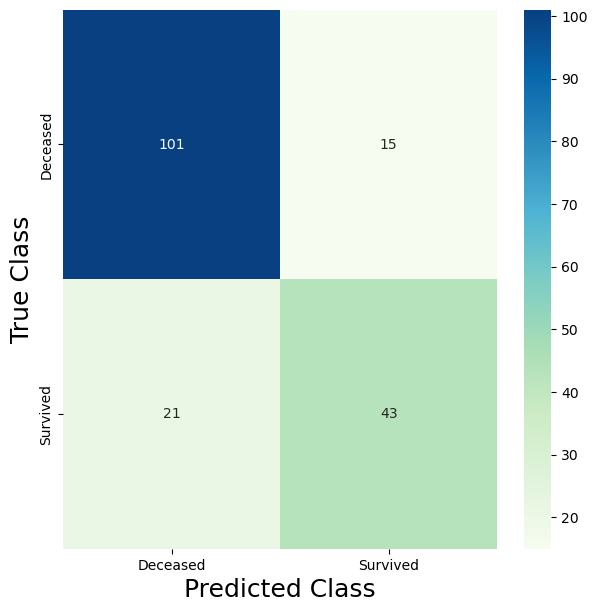

In [84]:
survived = {
    0: 'Deceased',
    1: 'Survived'
}
cm = confusion_matrix(Yt, predictions)

df_cm = pd.DataFrame(cm, index = [survived[i] for i in range(0,2)], columns = [survived[i] for i in range(0,2)])
plt.figure(figsize = (7,7))
sns.heatmap(df_cm, annot=True, cmap=plt.cm.GnBu, fmt='g')
plt.xlabel("Predicted Class", fontsize=18)
plt.ylabel("True Class", fontsize=18)
plt.show()